In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [7]:
# get the stock quote
df = web.DataReader("AAPL", data_source="yahoo", start="2015-01-01", end="2020-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.057606
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.819241
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.120045
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.122320
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.460564
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.549637
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.254608
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.440399


In [18]:
df.shape

(1512, 6)

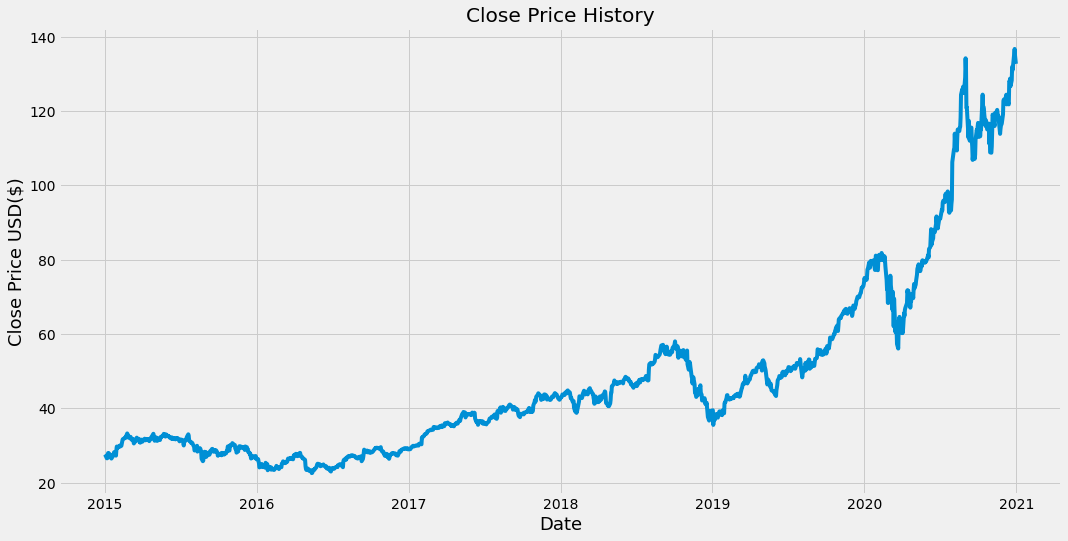

In [8]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.show()

In [9]:
# create a new dataframe with only "close column"
data = df.filter(["Close"])
#convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1210

In [10]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04390693],
       [0.04160643],
       [0.03485825],
       ...,
       [0.98404971],
       [0.97397133],
       [0.96494457]])

In [11]:
# create the training data set
# create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.04390693, 0.04160643, 0.03485825, 0.03488017, 0.0381447 ,
       0.04721529, 0.04747821, 0.04143114, 0.04355638, 0.04263618,
       0.0361071 , 0.0342886 , 0.04026994, 0.04208844, 0.04833269,
       0.04960345, 0.04986635, 0.04119014, 0.05470838, 0.06257395,
       0.05876168, 0.06198238, 0.06202621, 0.06401998, 0.06485256,
       0.06263968, 0.06437054, 0.06940975, 0.07567591, 0.07913764,
       0.08049604, 0.08213927, 0.08408922, 0.08349765, 0.08579817,
       0.09346655, 0.09164804, 0.08424257, 0.08781386, 0.08351959,
       0.08489987, 0.08549144, 0.08369483, 0.0790281 , 0.07944437,
       0.0806275 , 0.07486527, 0.06989177, 0.0747338 , 0.07284957,
       0.07582928, 0.0804084 , 0.08354148, 0.08141625, 0.07791071,
       0.08078086, 0.07964157, 0.07238947, 0.0742737 , 0.07210465])]
[0.07894046130471902]



In [12]:
# create the training data set
# create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04390693, 0.04160643, 0.03485825, 0.03488017, 0.0381447 ,
       0.04721529, 0.04747821, 0.04143114, 0.04355638, 0.04263618,
       0.0361071 , 0.0342886 , 0.04026994, 0.04208844, 0.04833269,
       0.04960345, 0.04986635, 0.04119014, 0.05470838, 0.06257395,
       0.05876168, 0.06198238, 0.06202621, 0.06401998, 0.06485256,
       0.06263968, 0.06437054, 0.06940975, 0.07567591, 0.07913764,
       0.08049604, 0.08213927, 0.08408922, 0.08349765, 0.08579817,
       0.09346655, 0.09164804, 0.08424257, 0.08781386, 0.08351959,
       0.08489987, 0.08549144, 0.08369483, 0.0790281 , 0.07944437,
       0.0806275 , 0.07486527, 0.06989177, 0.0747338 , 0.07284957,
       0.07582928, 0.0804084 , 0.08354148, 0.08141625, 0.07791071,
       0.08078086, 0.07964157, 0.07238947, 0.0742737 , 0.07210465])]
[0.07894046130471902]

[array([0.04390693, 0.04160643, 0.03485825, 0.03488017, 0.0381447 ,
       0.04721529, 0.04747821, 0.04143114, 0.04355638, 0.04263618,
       0.0361071 , 0.0342886 , 0.04

In [14]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1150, 60, 1)

In [17]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))



In [18]:
# compile the model
model.compile(optimizer = "adam", loss="mean_squared_error")

In [19]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1150/1150 [==============================] - 11s 10ms/step - loss: 4.2934e-04


In [21]:
# Create a testing data set
# create a new array containing scaled values from index 1150 to 2000
test_data = scaled_data[training_data_len - 60:]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60: i,0])

In [22]:
# convert the data to numpy array
x_test = np.array(x_test)

In [23]:
# reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [24]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [25]:
# get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.4105260230058074

In [29]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions



<ipython-input-29-0ea53d95669a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


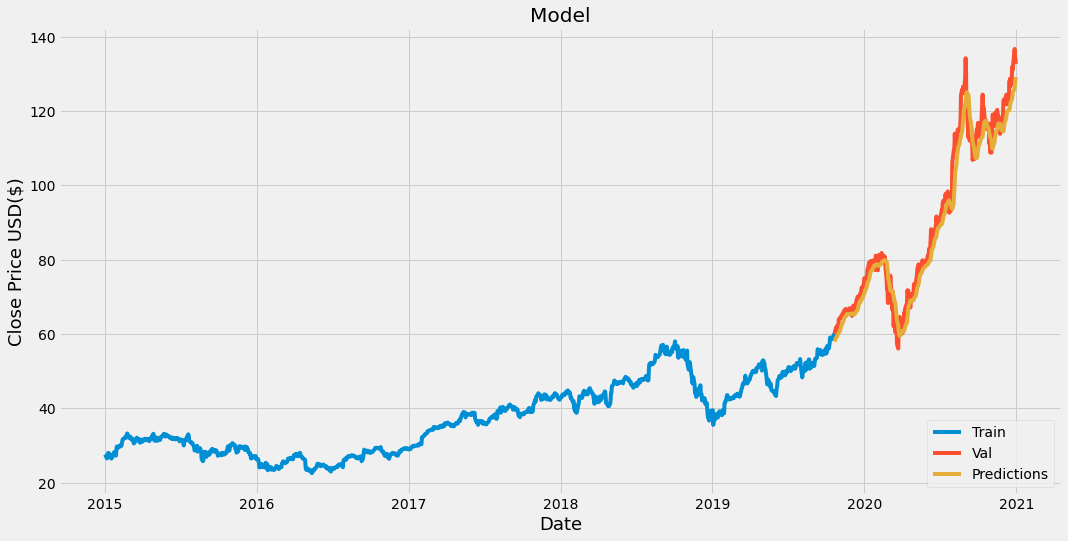

In [31]:
# visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")


In [32]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-22,59.990002,57.955299
2019-10-23,60.794998,58.258419
2019-10-24,60.895000,58.602158
2019-10-25,61.645000,58.946182
2019-10-28,62.262501,59.329872
...,...,...
2020-12-24,131.970001,125.162552
2020-12-28,136.690002,125.998688
2020-12-29,134.869995,127.221504


In [39]:
# get the quote 
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2015-01-01", end="2020-12-31")
# create new dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test = []
# append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test sata set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)



[[129.58032]]


In [44]:
# get the quote 
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start="2021-01-01", end="2021-01-01")
print(apple_quote2["Close"])

Date
2020-12-31    132.690002
Name: Close, dtype: float64
